# Business Problem

The main goal of this dataset is to predict if a person has cancer based on their age, lifestyle habits, and tumor details. This helps doctors quickly spot high-risk patients, enabling early diagnosis and better care.

# Data understanding

The dataset contains 2000 records with the following 10 features:

Age (float) – Age of the patient (some missing values).

Gender (object) – Gender of the patient (Male/Female).

Tumor_Size (float) – Size of the detected tumor (in cm, with missing values).

Tumor_Grade (object) – Grade of the tumor (Low, Medium, High).

Symptoms_Severity (object) – Severity of symptoms (Mild, Moderate, Severe).

Family_History (object) – Indicates if the patient has a family history of cancer (Yes/No).

Smoking_History (object) – Smoking habits (Current Smoker, Former Smoker, Never Smoked).

Alcohol_Consumption (object) – Level of alcohol intake (None, Moderate, High).

Exercise_Frequency (object) – Frequency of exercise (Regularly, Occasionally, Rarely).

Cancer_Present (int) – Target variable indicating if cancer is present (1) or not (0).

Key Observations:

Missing Data: Several features have missing values (e.g., Age, Tumor_Size, Tumor_Grade).

Target Variable: The dataset is for a binary classification problem (Cancer_Present: 0 or 1).


# Importing libraries

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\cancer_prediction_data.csv")

# Datset overview

> Total Records: 2000

> Total Features: 10

# Data description

This dataset contains 2000 records with 10 features used to predict the presence of cancer. It includes both numerical (Age, Tumor_Size) and categorical variables (Gender, Tumor_Grade, etc.) related to patient demographics, tumor characteristics, and lifestyle factors. The target variable, Cancer_Present, indicates whether cancer is present (1) or absent (0). Several features have missing values, necessitating proper preprocessing before analysis. Overall, the dataset is designed for binary classification to aid in early cancer detection and risk assessment.

# Data preparation

### EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1811 non-null   float64
 1   Gender               1794 non-null   object 
 2   Tumor_Size           1829 non-null   float64
 3   Tumor_Grade          1807 non-null   object 
 4   Symptoms_Severity    1815 non-null   object 
 5   Family_History       1792 non-null   object 
 6   Smoking_History      1821 non-null   object 
 7   Alcohol_Consumption  1321 non-null   object 
 8   Exercise_Frequency   1805 non-null   object 
 9   Cancer_Present       2000 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB
None
    Age  Gender  Tumor_Size Tumor_Grade Symptoms_Severity Family_History  \
0  62.0    Male    9.763242        High              Mild            Yes   
1  33.0    Male    7.946532         NaN          Moderate            Yes

In [7]:
# Descriptive statistics for numerical features
print(df.describe())

# Descriptive statistics for categorical features
print(df.describe(include=['object']))


               Age   Tumor_Size  Cancer_Present
count  1811.000000  1829.000000     2000.000000
mean     49.267808     5.133781        0.491500
std      17.361243     2.781335        0.500053
min      20.000000     0.507471        0.000000
25%      35.000000     2.700941        0.000000
50%      49.000000     5.079521        0.000000
75%      64.000000     7.588271        1.000000
max      79.000000     9.998166        1.000000
        Gender Tumor_Grade Symptoms_Severity Family_History Smoking_History  \
count     1794        1807              1815           1792            1821   
unique       2           3                 3              2               3   
top     Female         Low          Moderate            Yes   Former Smoker   
freq       930         619               614            897             624   

       Alcohol_Consumption Exercise_Frequency  
count                 1321               1805  
unique                   3                  4  
top                   High  

In [8]:
# Count missing values for each column
missing_values = df.isnull().sum()
print(missing_values)


Age                    189
Gender                 206
Tumor_Size             171
Tumor_Grade            193
Symptoms_Severity      185
Family_History         208
Smoking_History        179
Alcohol_Consumption    679
Exercise_Frequency     195
Cancer_Present           0
dtype: int64


In [ ]:
# Remove rows with any missing values
df= df.dropna()

In [ ]:
df.isnull().sum()

Age                    0
Gender                 0
Tumor_Size             0
Tumor_Grade            0
Symptoms_Severity      0
Family_History         0
Smoking_History        0
Alcohol_Consumption    0
Exercise_Frequency     0
Cancer_Present         0
dtype: int64

In [ ]:
df.shape

(607, 10)

In [ ]:
df.head()

,Age,Gender,Tumor_Size,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency,Cancer_Present
5,38.0,Male,3.435983,Medium,Moderate,No,Current Smoker,Moderate,Rarely,0
7,36.0,Male,8.007844,High,Moderate,Yes,Non-Smoker,High,Never,0
11,72.0,Male,7.910548,Low,Severe,Yes,Current Smoker,Low,Rarely,0
14,65.0,Male,6.672062,Low,Mild,No,Current Smoker,High,Never,1
15,55.0,Male,5.815395,Medium,Moderate,Yes,Current Smoker,Moderate,Occasionally,0


# Univariate analysis

Text(0.5, 1.0, 'Distribution of Age')

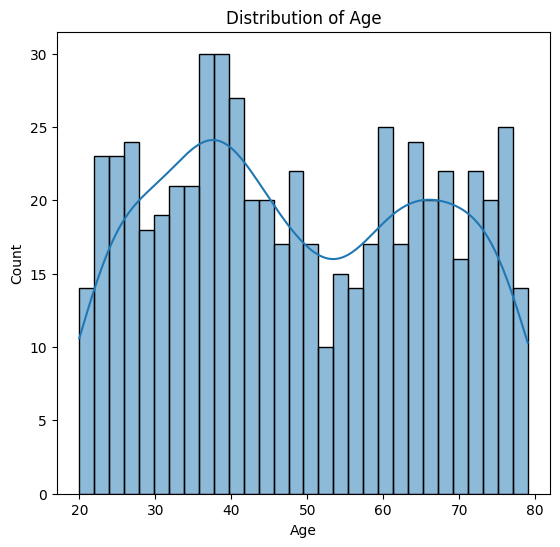

In [ ]:
# Distribution of Age and Tumor_Size
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')


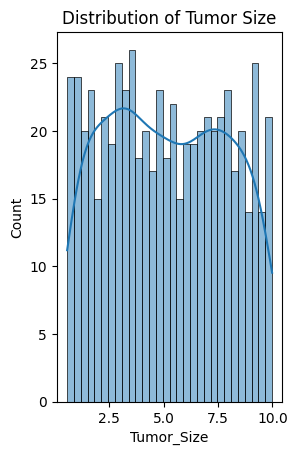

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(df['Tumor_Size'].dropna(), kde=True, bins=30)
plt.title('Distribution of Tumor Size')

plt.show()


# Categorical column analysis

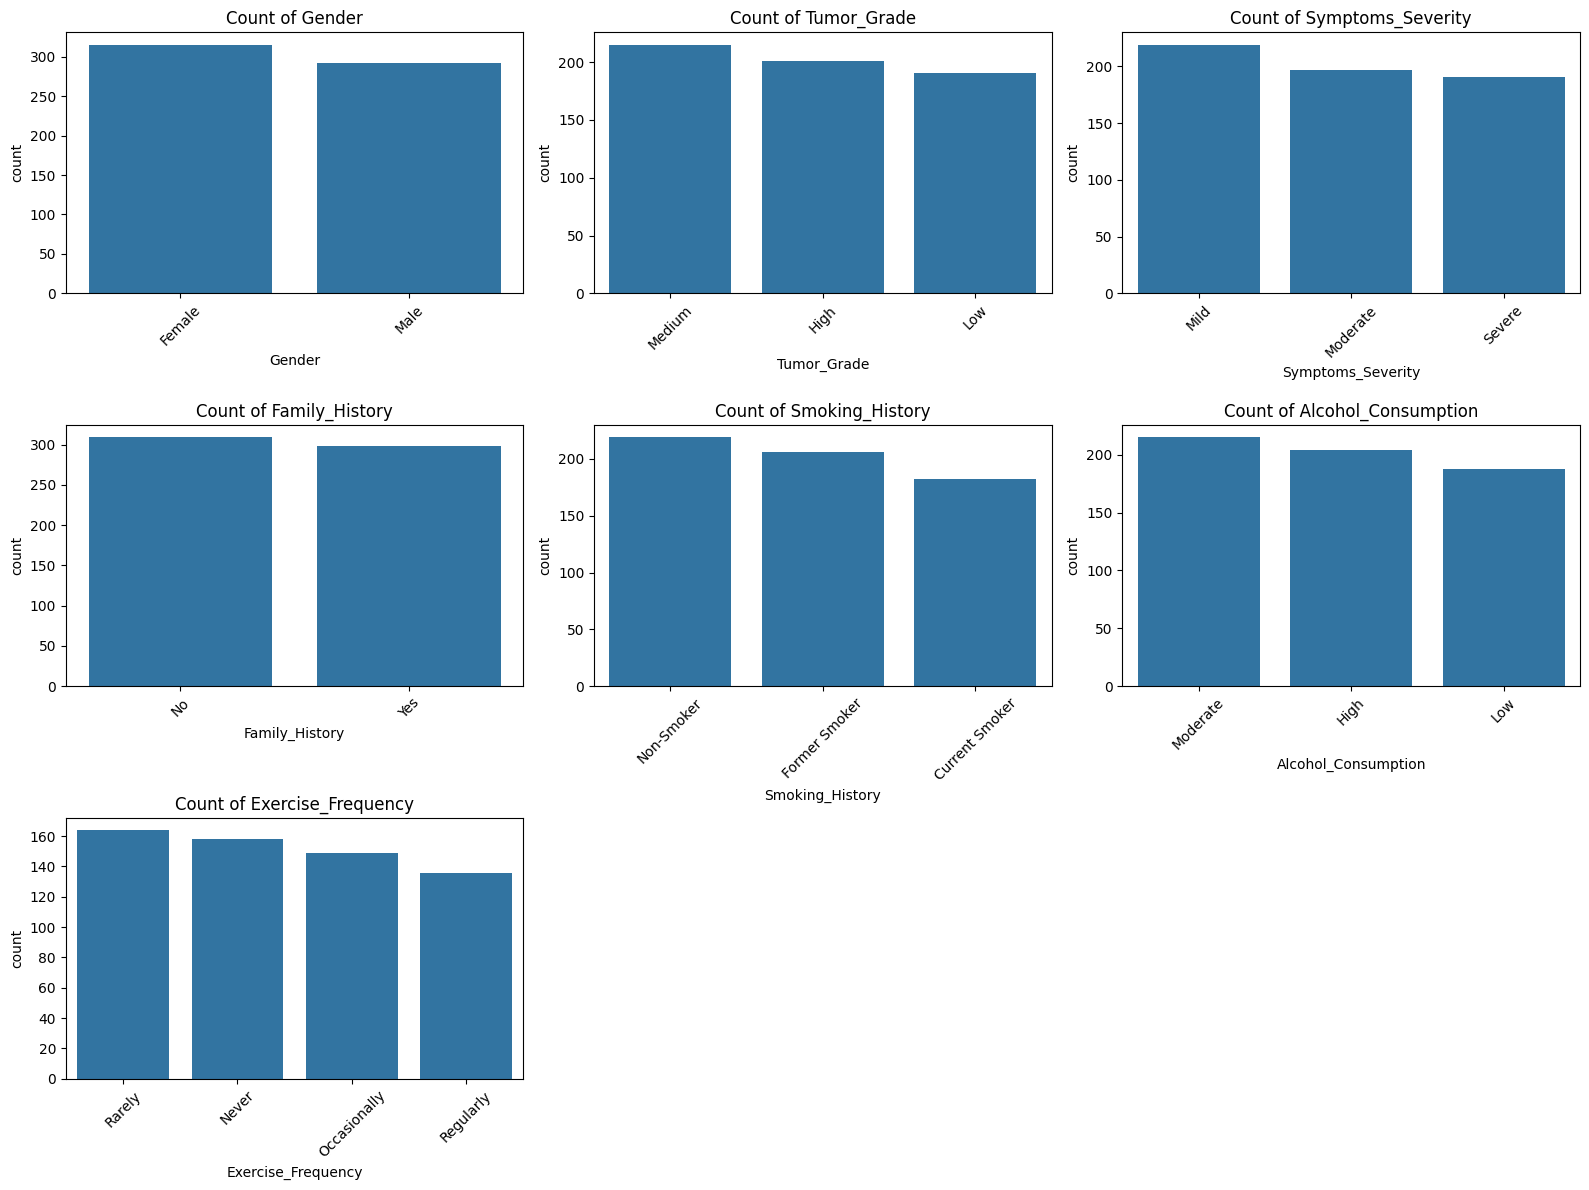

In [ ]:
categorical_cols = ['Gender', 'Tumor_Grade', 'Symptoms_Severity',
                    'Family_History', 'Smoking_History',
                    'Alcohol_Consumption', 'Exercise_Frequency']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Distribution

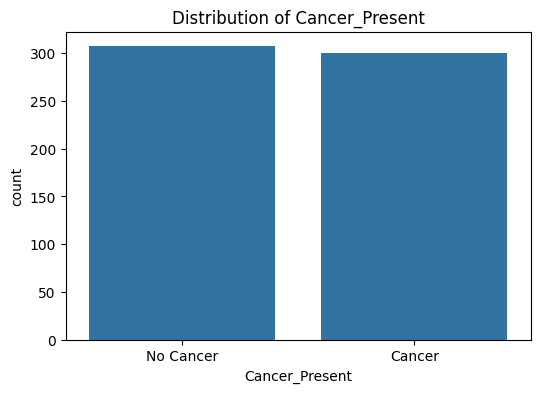

In [ ]:
# Distribution of the target variable: Cancer_Present
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Cancer_Present')
plt.title('Distribution of Cancer_Present')
plt.xticks([0, 1], ['No Cancer', 'Cancer'])
plt.show()


# Bivariate analysis

Text(0.5, 1.0, 'Age Distribution by Cancer Presence')

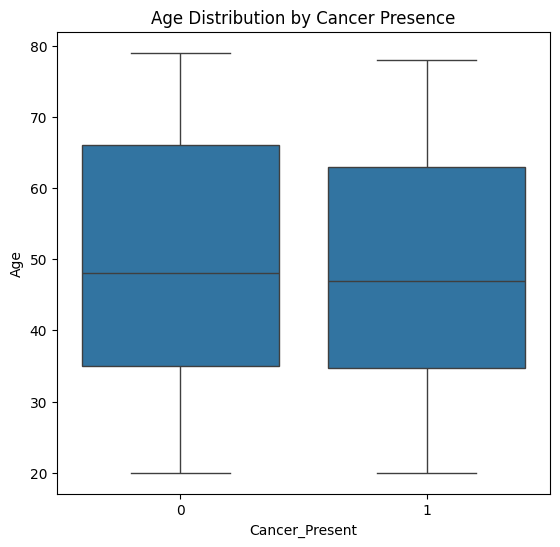

In [ ]:
# Compare Age and Tumor_Size distributions by Cancer_Present
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cancer_Present', y='Age', data=df)
plt.title('Age Distribution by Cancer Presence')


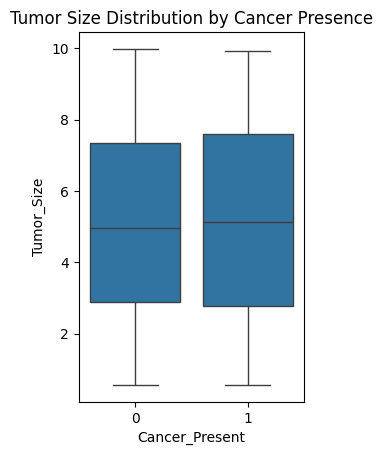

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(x='Cancer_Present', y='Tumor_Size', data=df)
plt.title('Tumor Size Distribution by Cancer Presence')

plt.show()


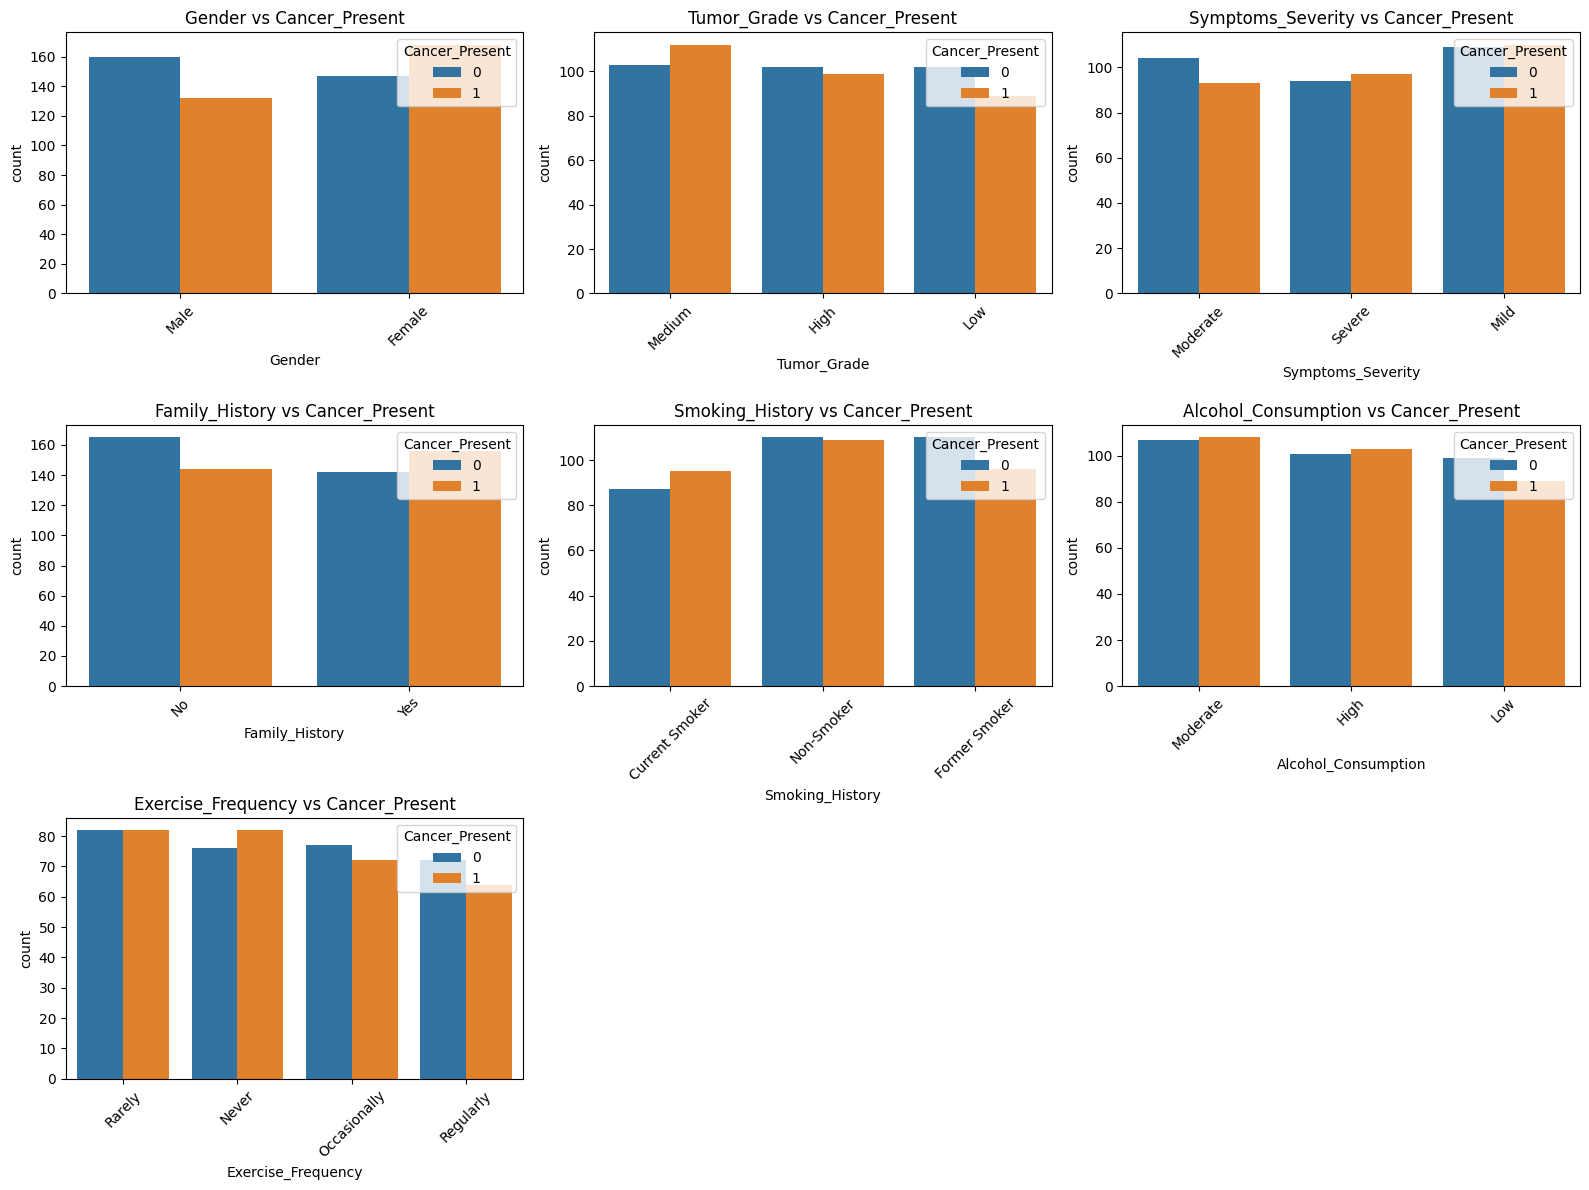

In [ ]:
# Analyze the relationship between categorical variables and the target
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='Cancer_Present')
    plt.title(f'{col} vs Cancer_Present')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Correlation Analysis

                     Age  Tumor_Size  Cancer_Present
Age             1.000000   -0.007634       -0.028905
Tumor_Size     -0.007634    1.000000        0.007573
Cancer_Present -0.028905    0.007573        1.000000


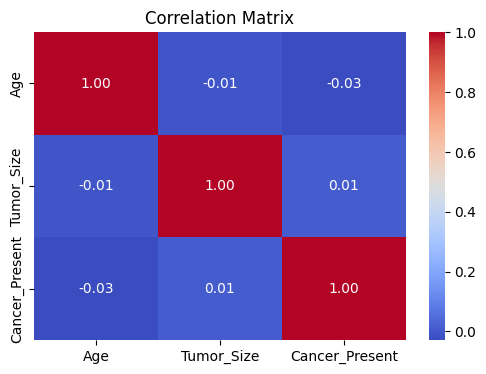

In [ ]:
# Compute correlation matrix for numerical features
numerical_cols = ['Age', 'Tumor_Size']
corr_matrix = df[numerical_cols + ['Cancer_Present']].corr()
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Data cleaning

In [ ]:
numeric=['Age','Tumor_Size']
ordinal=['Tumor_Grade','Symptoms_Severity','Alcohol_Consumption','Exercise_Frequency']
nominal=['Gender','Family_History','Smoking_History']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder

In [ ]:
numeric_preprocess=Pipeline([('Mean imputation',SimpleImputer(strategy='mean')),
                            ('Scaling',StandardScaler())])        #list of tuples

numeric_preprocess

Pipeline(steps=[('Mean imputation', SimpleImputer()),
                ('Scaling', StandardScaler())])

In [ ]:
ordinal_preprocess=Pipeline([('Mode imputation',SimpleImputer(strategy='most_frequent')),
                    ('Encoding',OneHotEncoder(sparse_output=False))])
ordinal_preprocess

Pipeline(steps=[('Mode imputation', SimpleImputer(strategy='most_frequent')),
                ('Encoding', OneHotEncoder(sparse_output=False))])

In [ ]:
nominal_preprocess=Pipeline([('Mode Impution',SimpleImputer(strategy='most_frequent')),
                            ('Encoding',OneHotEncoder(sparse_output=False))])
nominal_preprocess

Pipeline(steps=[('Mode Impution', SimpleImputer(strategy='most_frequent')),
                ('Encoding', OneHotEncoder(sparse_output=False))])

In [ ]:
preprocess=ColumnTransformer([('Numerical Transformation',numeric_preprocess,numeric),
                             ('Ordinal Transformation',ordinal_preprocess,ordinal),
                             ('Nominal transformer',nominal_preprocess,nominal)],remainder='passthrough')
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical Transformation',
                                 Pipeline(steps=[('Mean imputation',
                                                  SimpleImputer()),
                                                 ('Scaling',
                                                  StandardScaler())]),
                                 ['Age', 'Tumor_Size']),
                                ('Ordinal Transformation',
                                 Pipeline(steps=[('Mode imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoding',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Tumor_Grade', 'Symptoms_Severity',
                                  'Alcohol_Consumption',
                                  'Exercise_Frequency']),
                                ('Nominal transformer',
                                 Pipeline(steps=[('Mode Impution',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoding',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Gender', 'Family_History',
                                  'Smoking_History'])])

# Model Building

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
X=df.drop('Cancer_Present',axis=1)
y=df['Cancer_Present']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

# Decision tree

In [ ]:
dt=Pipeline([('Data preprocessing',preprocess),
            ('Algorithm',DecisionTreeClassifier())])

In [ ]:
dt.fit(X_train,y_train).score(X_test,y_test)

0.5409836065573771

# Logistic regression

In [ ]:
log=Pipeline([('Data preprocessing',preprocess),
             ('Algorithm',LogisticRegression())])
log.fit(X_train,y_train).score(X_test,y_test)

0.48360655737704916

# KNN

In [ ]:
knn=Pipeline([('Data preprocessing',preprocess),
             ('Algorithm',KNeighborsClassifier())])
knn

Pipeline(steps=[('Data preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tumor_Size']),
                                                 ('Ordinal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Tumor_Grade',
                                                   'Symptoms_Severity',
                                                   'Alcohol_Consumption',
                                                   'Exercise_Frequency']),
                                                 ('Nominal transformer',
                                                  Pipeline(steps=[('Mode '
                                                                   'Impution',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Gender', 'Family_History',
                                                   'Smoking_History'])])),
                ('Algorithm', KNeighborsClassifier())])

# XGBoost


In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb=Pipeline([('Data Preprocessing',preprocess),
             ('Algorithm',XGBClassifier())])
xgb.fit(X_train,y_train).score(X_test,y_test)

0.5573770491803278

# Random forest

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [ ]:

rf = Pipeline([
    ('Data Preprocessing', preprocess),
    ('Algorithm', RandomForestClassifier())
])

# Fit the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model on the test data
rf_score = rf.score(X_test, y_test)
rf_score


0.5327868852459017

# SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


In [ ]:
svm = Pipeline([
    ('Data Preprocessing', preprocess),
    ('Algorithm', SVC())  # You can adjust parameters if needed
])

# Fit the SVM model on the training data
svm.fit(X_train, y_train)

# Evaluate the SVM model on the test data
svm_score = svm.score(X_test, y_test)
svm


Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tumor_Size']),
                                                 ('Ordinal Transformation',
                                                  Pipeline(steps=[('Mode '
                                                                   'imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Tumor_Grade',
                                                   'Symptoms_Severity',
                                                   'Alcohol_Consumption',
                                                   'Exercise_Frequency']),
                                                 ('Nominal transformer',
                                                  Pipeline(steps=[('Mode '
                                                                   'Impution',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Gender', 'Family_History',
                                                   'Smoking_History'])])),
                ('Algorithm', SVC())])

In [ ]:
svm_score

0.5655737704918032

In [ ]:
from sklearn.metrics import accuracy_score

# Fit and predict for Decision Tree
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Fit and predict for Logistic Regression
log.fit(X_train, y_train)
log_pred = log.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)

# Fit and predict for XGBoost
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Fit and predict for Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Fit and predict for SVM
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print all accuracy scores
print("Accuracy Scores of All Models:")
print(f"Decision Tree Accuracy      : {dt_accuracy * 100:.2f}%")
print(f"Logistic Regression Accuracy: {log_accuracy * 100:.2f}%")
print(f"XGBoost Accuracy            : {xgb_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy      : {rf_accuracy * 100:.2f}%")
print(f"SVM Accuracy                : {svm_accuracy * 100:.2f}%")


Accuracy Scores of All Models:
Decision Tree Accuracy      : 53.28%
Logistic Regression Accuracy: 48.36%
XGBoost Accuracy            : 55.74%
Random Forest Accuracy      : 50.82%
SVM Accuracy                : 56.56%
